In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() #유방암 데이터 샘플

In [7]:
print(cancer.data.shape, cancer.target.shape) #데이터 크기
print(cancer.data[:3]) #샘플 3개 출력

(569, 30) (569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


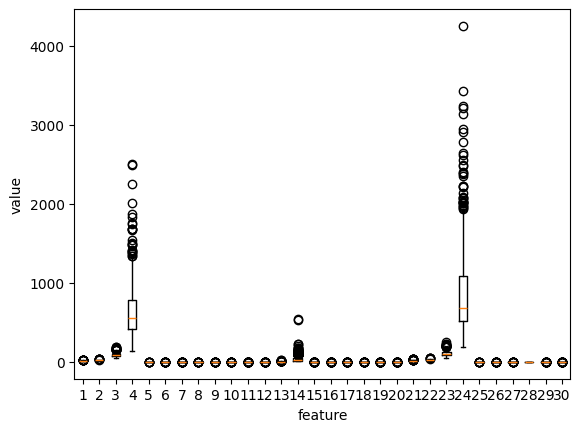

In [24]:
plt.boxplot(cancer.data) #박스플롯으로 데이터 구현
plt.xlabel('feature') #가로 : 30개의 특성
plt.ylabel('value') #세로 : 샘플값
plt.show()

In [10]:
cancer.feature_names[[3,13,23]] #눈에 띄는 특성 살펴보기

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [11]:
np.unique( cancer.target, return_counts=True ) #타겟 데이터가 뭐뭐 있는지, 그 데이터들이 각각 몇 개 있는지

(array([0, 1]), array([212, 357]))

In [13]:
x = cancer.data
y = cancer.target

In [26]:
from sklearn.model_selection import train_test_split #훈련세트 75%, 테스트 세트 25%
x_train, x_test, y_train, y_test = train_test_split( x, y, stratify=y, test_size=0.2, random_state=42 )
#훈련 & 테스터 입력값, 훈련 & 테스터 타겟

print( x_train.shape, x_test.shape) #훈련세트:테스터세트 비율이 4:1
np.unique( y_train, return_counts=True ) #타겟 0,1 개수비가 세트를 나누어서도 적용이 됨

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [19]:
class LogisticNeuron :
  def __init__(self) :
    self.w = None
    self.b = None

  def forpass(self, x) : #정방향 계산, z 반환
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err) :
    w_grad = x * err #가중치 변화율(그레이디언트) 계산
    b_grad = 1 * err #절편 변화율(그레이디언트) 계산
    return w_grad, b_grad

  def fit(self, x, y, epochs=100) : #훈련
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs) :
      for x_i, y_i in zip(x,y) :
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def activation(self, z) : #활성화 함수(시그모이드 함수)
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x) :
    z = [self.forpass(x_i) for x_i in x] #정방향 계산
    a = self.activation( np.array(z) ) #활성화 함수 적용
    return a > 0.5

In [20]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-19-bc0a2112389f>:28: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [21]:
np.mean( neuron.predict(x_test) == y_test )

<ipython-input-19-bc0a2112389f>:28: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


np.float64(0.8245614035087719)

In [30]:
class SingleLayer :
  def __init__(self) :
    self.w = None
    self.b = None
    self.losses = [] #손실함수의 결괏값 평균 저장

  def forpass(self, x) : #정방향 계산, z 반환
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err) :
    w_grad = x * err #가중치 변화율(그레이디언트) 계산
    b_grad = 1 * err #절편 변화율(그레이디언트) 계산
    return w_grad, b_grad

  def activation(self, z) : #활성화 함수(시그모이드 함수)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100) : #훈련
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs) :
      loss = 0 #손실값
      indexes = np.random.permutation( np.arange(len(x)) ) #샘플 순서 섞기
      for i in indexes : #샘플 수만큼 반복. x[i], y[i]에서 i가 랜덤 샘플로 만들어줌
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip( a, 1e-10, 1-1e-10 ) #log(a)의 값이 무한대로 가면
                                         # 계산 정확x => 클리핑 후 손실 계산

        loss += -( y[i]*np.log(a) + (1-y[i])*np.log(1-a) ) #손실량 누적
      self.losses.append(loss/len(y)) #손실량의 평균 계산

  def predict(self, x) :
    z = [self.forpass(x_i) for x_i in x] #정방향 계산
    return np.array(z) > 0 #z>0 -> a>0.5 => 양 (즉, 굳이 활성화 안 해도 바로 계산 가능)

  def score(self, x, y) :
    return np.mean(self.predict(x) == y) # 0 <= y_hat와 y 비교한 값 계산 <= 1

<ipython-input-30-0a9585681d21>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


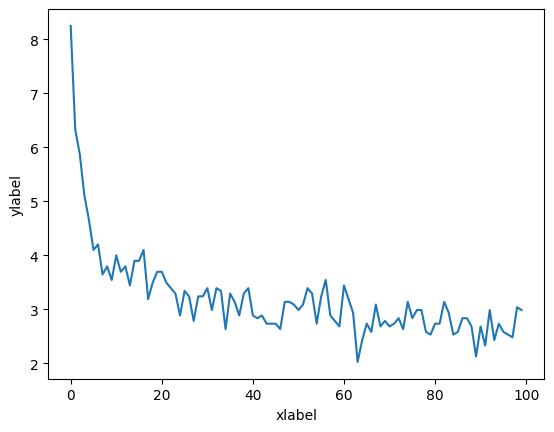

In [33]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

plt.plot(layer.losses)
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show() #손실함수의 값이 에포크가 진행됨에 따라 감소하고 있음을 보여준다

In [36]:
from sklearn.linear_model import SGDClassifier

In [40]:
sgd = SGDClassifier( loss='log_loss', max_iter=100, tol=1e-3, random_state=42 )

sgd.fit(x_train, y_train)
print( sgd.score(x_test, y_test) )
sgd.predict(x_test[0:10])

0.8333333333333334


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])